In [ ]:
import pandas as pd
from sklearn import datasets

# Cargar el dataset Iris desde scikit-learn
iris = datasets.load_iris()

# Convertirlo en un DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Mapear los números de especies a nombres
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Mostrar las primeras filas
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Esto calculará los promedios del largo y ancho de los sépalos y pétalos para las tres especies: setosa, versicolor, y virginica

In [ ]:
# Agrupar por especie y calcular el promedio
species_mean = df.groupby('species').mean()

# Mostrar los promedios de las características
print(species_mean)

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


El código para calcular estas distancias entre los promedios es el siguiente:

In [ ]:
import numpy as np

# Funciones para calcular las distancias
def manhattan_distance(vec1, vec2):
    return np.sum(np.abs(vec1 - vec2))

def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

# Obtener los vectores de promedios para cada especie
setosa_mean = species_mean.loc['setosa'].values
versicolor_mean = species_mean.loc['versicolor'].values
virginica_mean = species_mean.loc['virginica'].values

# Calcular distancias Manhattan
manhattan_setosa_versicolor = manhattan_distance(setosa_mean, versicolor_mean)
manhattan_setosa_virginica = manhattan_distance(setosa_mean, virginica_mean)
manhattan_versicolor_virginica = manhattan_distance(versicolor_mean, virginica_mean)

# Calcular distancias Euclidianas
euclidean_setosa_versicolor = euclidean_distance(setosa_mean, versicolor_mean)
euclidean_setosa_virginica = euclidean_distance(setosa_mean, virginica_mean)
euclidean_versicolor_virginica = euclidean_distance(versicolor_mean, virginica_mean)

# Mostrar los resultados
print(f"Distancia Manhattan Setosa vs Versicolor: {manhattan_setosa_versicolor}")
print(f"Distancia Manhattan Setosa vs Virginica: {manhattan_setosa_virginica}")
print(f"Distancia Manhattan Versicolor vs Virginica: {manhattan_versicolor_virginica}")

print(f"Distancia Euclidiana Setosa vs Versicolor: {euclidean_setosa_versicolor}")
print(f"Distancia Euclidiana Setosa vs Virginica: {euclidean_setosa_virginica}")
print(f"Distancia Euclidiana Versicolor vs Virginica: {euclidean_versicolor_virginica}")

Distancia Manhattan Setosa vs Versicolor: 5.465999999999999
Distancia Manhattan Setosa vs Virginica: 7.905999999999999
Distancia Manhattan Versicolor vs Virginica: 2.848
Distancia Euclidiana Setosa vs Versicolor: 3.2082811597489393
Distancia Euclidiana Setosa vs Virginica: 4.754507335150509
Distancia Euclidiana Versicolor vs Virginica: 1.6204888151419004


Para visualizar las distancias calculadas, podemos usar matplotlib para crear un gráfico de barras.

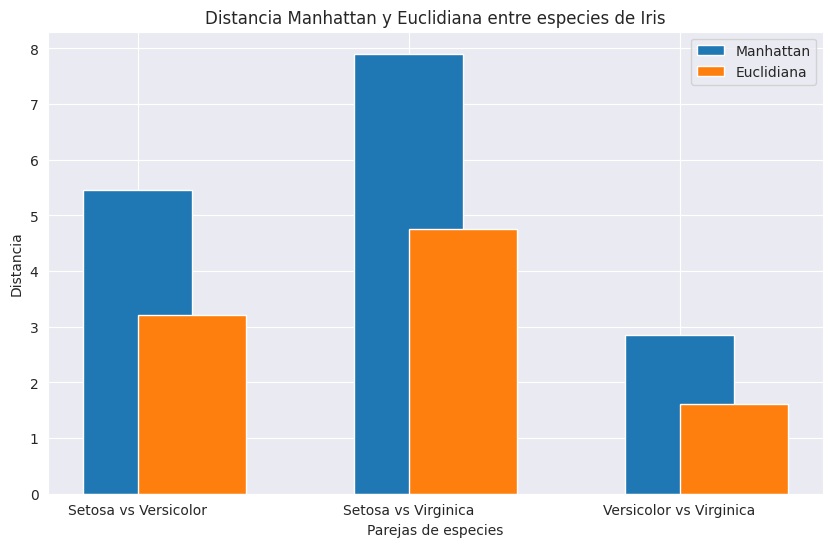

In [ ]:
import matplotlib.pyplot as plt

# Datos para el gráfico
species_pairs = ['Setosa vs Versicolor', 'Setosa vs Virginica', 'Versicolor vs Virginica']
manhattan_distances = [manhattan_setosa_versicolor, manhattan_setosa_virginica, manhattan_versicolor_virginica]
euclidean_distances = [euclidean_setosa_versicolor, euclidean_setosa_virginica, euclidean_versicolor_virginica]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

plt.bar(species_pairs, manhattan_distances, width=0.4, label='Manhattan', align='center')
plt.bar(species_pairs, euclidean_distances, width=0.4, label='Euclidiana', align='edge')

plt.xlabel('Parejas de especies')
plt.ylabel('Distancia')
plt.title('Distancia Manhattan y Euclidiana entre especies de Iris')
plt.legend()
plt.show()

Conclusiones
Las distancias Euclidianas serán menores que las distancias Manhattan debido a cómo se calculan las diferencias (la Manhattan es una suma de distancias absolutas, mientras que la Euclidiana toma en cuenta la raíz cuadrada de las diferencias al cuadrado).
A partir de las distancias, podríamos deducir qué especies están más relacionadas en términos de sus características de sépalo y pétalo.

¿Puede un modelo agrupar datos con base en estas medidas?

¡Sí! Un modelo de clustering puede agrupar datos en función de estas medidas (distancia Manhattan, Euclidiana, etc.). Los algoritmos de clustering buscan agrupar datos basándose en la similitud o cercanía de sus características, y las distancias entre los puntos de datos juegan un papel crucial para definir estas similitudes.

Algunos de los algoritmos de clustering más comunes que pueden usar distancias para agrupar los datos son:

1. K-Means:
Utiliza la distancia Euclidiana como métrica predeterminada para agrupar datos en k clusters.
Este algoritmo agrupa los puntos en k clusters de tal manera que minimiza la suma de las distancias al centroide de cada cluster.
2. Clustering Jerárquico (Hierarchical Clustering):
Este método puede utilizar diferentes métricas de distancia, incluidas la distancia Euclidiana, Manhattan, Chebyshev, y otras.
Agrupa los puntos de datos de manera jerárquica, construyendo un árbol de relaciones entre los puntos y agrupando según las distancias entre los clusters más cercanos.
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
Este algoritmo agrupa puntos basándose en la densidad de los datos, utilizando una métrica de distancia como Euclidiana o Manhattan.
Identifica áreas de alta densidad de puntos y los agrupa en clusters, mientras que trata los puntos fuera de estas áreas como "ruido".

       species  cluster
0       setosa        1
1       setosa        1
2       setosa        1
3       setosa        1
4       setosa        1
..         ...      ...
145  virginica        2
146  virginica        0
147  virginica        2
148  virginica        2
149  virginica        0

[150 rows x 2 columns]


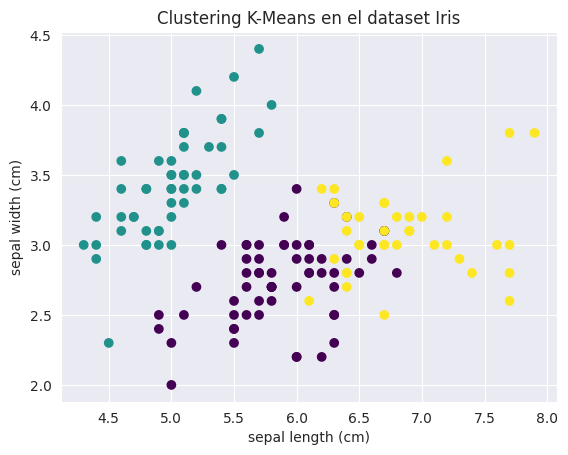

In [ ]:
# Vamos a usar K-Means para agrupar el conjunto de datos Iris basándonos en sus características.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir el modelo de K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Ajustar el modelo con los datos de características
kmeans.fit(df.iloc[:, :-1])

# Obtener las etiquetas de los clusters
clusters = kmeans.labels_

# Añadir las etiquetas al DataFrame original
df['cluster'] = clusters

# Mostrar el DataFrame con los clusters asignados
print(df[['species', 'cluster']])

# Visualización simple de los clusters (usando las dos primeras características)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering K-Means en el dataset Iris')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Conclusión
Los modelos de clustering como K-Means pueden agrupar los datos de Iris basándose en las distancias entre las medidas (largo y ancho de sépalo y pétalo). El uso de diferentes distancias puede afectar cómo se agrupan los datos y qué puntos se consideran similares.

Distancia Euclidiana: Suele ser la más común para estos modelos, especialmente en algoritmos como K-Means.
Distancia Manhattan: Puede ser útil cuando queremos que las diferencias absolutas jueguen un papel más relevante, por ejemplo, en casos donde las características tienen escalas diferentes.

¿Si no se tuviese la especie de la flor como dato en el dataset, se podría encontrar cuántas especies existen? ¿Cómo se emplearía la medida de distancia para ese fin?

Sí, incluso si no se tuviera la especie de la flor como dato explícito en el dataset, sí sería posible encontrar cuántas especies existen (o cuántos grupos distintos de flores hay) utilizando técnicas de clustering no supervisado. Estos métodos permiten agrupar los datos basándose en las similitudes entre las características (como las medidas del sépalo y el pétalo), sin conocer las etiquetas o clases a priori.